Exploratory Data Analysis of GTA: San Andreas Vehicle Stats using Seaborn

Don't forget to upvote if you enjoy my work :)

# Introduction

As a fan of Grand Theft Auto, I recently revisited the iconic San Andreas after exams - and while playing, I became curious about the in-game cars and their hidden stats. So I decided to combine my love for games with my interest in data analysis by performing an EDA on vehicle stats extracted from the game files.

In this notebook, you'll find:
- Technical information about 162 vehicles from GTA: San Andreas
- Cleaned and well-structured dataset
- Descriptive statistics and visualizations
- Analysis of relationships between vehicle attributes (e.g., speed vs weight)

Import libraries:

These are the only libraries we're going to use for this EDA

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

The data was sourced from gta.fandom.com and loaded into a pandas DataFrame. I examined the structure of the dataset, checked for missing values, and used .info() and .describe() to understand column types and basic distributions. I prepared the dataset, so you can use it for your ideas: [Clean and ready GTA:SA Vehicle Stats dataset](https://www.kaggle.com/datasets/marcelbiezunski/gta-san-andreas-vehicle-stats-full-handling-data)

In [20]:
dataset = 'gta_sa_vehicle_stats_ready.csv'
df = pd.read_csv(dataset)
pd.set_option('display.max_columns', None)
df

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass_x,center_of_mass_y,center_of_mass_z,center_of_mass_%submerged,traction_multiplier,traction_loss,traction_bias(%),#_of_gears,max_velocity(km/h),acceleration(ms^2),interia,drive_type,engine_type,brakes_deceleration(ms^2),brakes_bias(%),abs,steering_lock_(°),suspension_force_level,suspension_damping_level,suspension_high_speed_com_damping,suspension_lines_upper_limit,suspension_lines_lower_limit,suspension_lines_bias_between_front_and_rear,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights_front,lights_rear,lights_anim_group
0,LANDSTAL,1700.0,5008.3,2.5,0.0,0.0,-0.3,85,0.75,0.85,0.50,5,160.0,25.0,20.0,4,D,6.2,0.60,0,35.0,2.4,0.08,0.0,0.28,-0.14,0.50,0.25,0.27,0.23,25000,20,500002,0,1,0.0
1,BRAVURA,1300.0,2200.0,1.7,0.0,0.3,0.0,70,0.65,0.80,0.52,9,144.0,15.0,10.0,Front,Petrol,8.0,0.80,0,30.0,1.3,0.08,0.0,0.31,-0.15,0.57,0.00,0.26,0.50,9000,1,1,Long,Long,0.0
2,BUFFALO,1500.0,4000.0,2.0,0.0,0.0,-0.1,85,0.70,0.90,0.50,9,200.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,1.2,0.12,0.0,0.28,-0.24,0.50,0.40,0.25,0.50,35000,2800,10200000,Small,Small,0.0
3,LINERUN,3800.0,19953.2,5.0,0.0,0.0,-0.2,90,0.95,0.65,0.40,9,160.0,25.0,30.0,Rear,Diesel,8.0,0.30,0,25.0,1.6,0.06,0.0,0.40,-0.20,0.50,0.00,0.65,0.25,35000,6000,200,Long,Small,2.0
4,PEREN,1200.0,3000.0,2.5,0.0,0.1,0.0,70,0.70,0.90,0.48,9,150.0,18.0,20.0,Front,Petrol,4.0,0.80,0,30.0,1.4,0.10,0.0,0.37,-0.17,0.50,0.00,0.20,0.60,10000,20,0,Small,Small,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,STAIRS,1000.0,2500.0,5.0,0.0,0.4,-0.2,70,1.00,0.85,0.50,3,160.0,20.0,30.0,Rear,Electric,5.0,0.50,0,30.0,2.0,0.09,0.0,0.25,-0.10,0.50,0.00,0.26,0.50,9000,3100,4,Small,Small,0.0
158,BOXBURG,5500.0,23489.6,3.0,0.0,0.0,0.0,80,0.82,0.70,0.46,5,140.0,14.0,25.0,Rear,Diesel,4.5,0.60,0,30.0,0.9,0.08,0.0,0.25,-0.25,0.35,0.60,0.36,0.40,22000,4009,201,Long,Tall,13.0
159,FARM_TR1,400.0,400.0,5.0,0.0,-0.4,0.0,70,0.60,0.85,0.50,3,160.0,20.0,30.0,Rear,Electric,5.0,0.50,0,30.0,1.0,0.10,0.0,0.25,-0.10,0.50,0.00,0.26,0.50,9000,3100,4,Small,Small,0.0
160,UTIL_TR1,1000.0,1354.2,5.0,0.0,0.0,0.0,70,1.00,0.85,0.50,3,160.0,20.0,30.0,Rear,Electric,5.0,0.50,0,30.0,2.0,0.09,0.0,0.25,-0.10,0.50,0.00,0.26,0.50,9000,3100,4,Small,Small,0.0


# Understanding the Dataset Structure

Before diving deeper into analysis, it's important to get a general overview of the dataset. In this section, I examine the structure and content of the data using several basic exploratory methods:

- dtypes – to check the data types of each column, which helps us understand whether the features are numerical, categorical, or textual.
- info() – to get a summary of the dataset, including non-null counts and memory usage.
- describe() – to generate basic statistical summaries for numerical columns such as mean, standard deviation, min/max, and quartiles.
- unique() / nunique() – to inspect the diversity of values.

This initial exploration helps us spot potential issues such as missing values, unexpected data types or strange distributions, and gives us a clearer picture of what kind of information we’re working with.

In [21]:
for c in df.columns:
    if c not in ['identifier', 'drive_type', 'engine_type', 'model_flags',
                 'handling_flags', 'lights_front', 'lights_rear']:
        df[c] = pd.to_numeric(df[c])

In [22]:
df.select_dtypes(include='object')

,identifier,drive_type,engine_type,model_flags,handling_flags,lights_front,lights_rear
0,LANDSTAL,4,D,20,500002,0,1
1,BRAVURA,Front,Petrol,1,1,Long,Long
2,BUFFALO,Rear,Petrol,2800,10200000,Small,Small
3,LINERUN,Rear,Diesel,6000,200,Long,Small
4,PEREN,Front,Petrol,20,0,Small,Small
...,...,...,...,...,...,...,...
157,STAIRS,Rear,Electric,3100,4,Small,Small
158,BOXBURG,Rear,Diesel,4009,201,Long,Tall
159,FARM_TR1,Rear,Electric,3100,4,Small,Small
160,UTIL_TR1,Rear,Electric,3100,4,Small,Small


In [23]:
df.select_dtypes(include='object').nunique()

identifier        162
drive_type          4
engine_type         4
model_flags        76
handling_flags     68
lights_front        4
lights_rear         6
dtype: int64

In [24]:
for c in df.select_dtypes(include='object').columns:
    if c not in ['identifier', 'model_flags', 'handling_flags']:
        print(f'Unique Values in "{c}":', df[c].unique())

Unique Values in "drive_type": ['4' 'Front' 'Rear' 'R']
Unique Values in "engine_type": ['D' 'Petrol' 'Diesel' 'Electric']
Unique Values in "lights_front": ['0' 'Long' 'Small' 'Big']
Unique Values in "lights_rear": ['1' 'Long' 'Small' 'Tall' 'Big' '3']


In [25]:
df['drive_type'] = df['drive_type'].replace('R', 'Rear')
df['engine_type'] = df['engine_type'].replace('D', 'Diesel')

In [26]:
for c in ['drive_type', 'engine_type']:
    print(f'Unique Values in {c}:', df[c].unique())

Unique Values in drive_type: ['4' 'Front' 'Rear']
Unique Values in engine_type: ['Diesel' 'Petrol' 'Electric']


In [27]:
df['drive_type'] = df['drive_type'].astype('category')
df['engine_type'] = df['engine_type'].astype('category')

In [28]:
df.dtypes

identifier                                        object
mass_(kg)                                        float64
turn_mass_(kg)                                   float64
drag_multiplier                                  float64
center_of_mass_x                                 float64
center_of_mass_y                                 float64
center_of_mass_z                                 float64
center_of_mass_%submerged                          int64
traction_multiplier                              float64
traction_loss                                    float64
traction_bias(%)                                 float64
#_of_gears                                         int64
max_velocity(km/h)                               float64
acceleration(ms^2)                               float64
interia                                          float64
drive_type                                      category
engine_type                                     category
brakes_deceleration(ms^2)      

In [29]:
df.select_dtypes(include='category').nunique()

drive_type     3
engine_type    3
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   identifier                                    162 non-null    object  
 1   mass_(kg)                                     162 non-null    float64 
 2   turn_mass_(kg)                                162 non-null    float64 
 3   drag_multiplier                               162 non-null    float64 
 4   center_of_mass_x                              162 non-null    float64 
 5   center_of_mass_y                              162 non-null    float64 
 6   center_of_mass_z                              162 non-null    float64 
 7   center_of_mass_%submerged                     162 non-null    int64   
 8   traction_multiplier                           162 non-null    float64 
 9   traction_loss                                 162 non-

In [31]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
identifier,162,162,LANDSTAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mass_(kg),162.0,NaN,NaN,NaN,2964.506173,3493.732997,100.0,1412.5,1775.0,3500.0,25500.0
turn_mass_(kg),162.0,NaN,NaN,NaN,13925.076543,29343.371204,24.1,3066.95,4350.0,10917.85,250000.0
drag_multiplier,162.0,NaN,NaN,NaN,2.828395,2.166557,1.0,2.0,2.2,3.0,20.0
center_of_mass_x,162.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
center_of_mass_y,162.0,NaN,NaN,NaN,0.041975,0.191181,-0.8,0.0,0.0,0.1,0.5
center_of_mass_z,162.0,NaN,NaN,NaN,-0.117222,0.155421,-0.6,-0.2,-0.1,0.0,0.3
center_of_mass_%submerged,162.0,NaN,NaN,NaN,77.962963,7.931296,50.0,70.0,75.0,85.0,110.0
traction_multiplier,162.0,NaN,NaN,NaN,0.719815,0.18091,0.45,0.65,0.7,0.75,2.5
traction_loss,162.0,NaN,NaN,NaN,0.808333,0.063356,0.65,0.8,0.8,0.85,0.92


# Distribution of Key Vehicle Attributes

To better understand how the main numerical features are distributed, let’s take a look at four histograms:
- vehicle mass,
- acceleration,
- top speed,
- in-game monetary value.

Each histogram includes a KDE (Kernel Density Estimate) line, which gives us a smoothed version of the distribution curve. This helps to visualize the general shape and spread of the data beyond just the bar heights.

These plots allow us to quickly spot skewed distributions, common value ranges and potential outliers - all useful insights for further analysis or preprocessing steps.

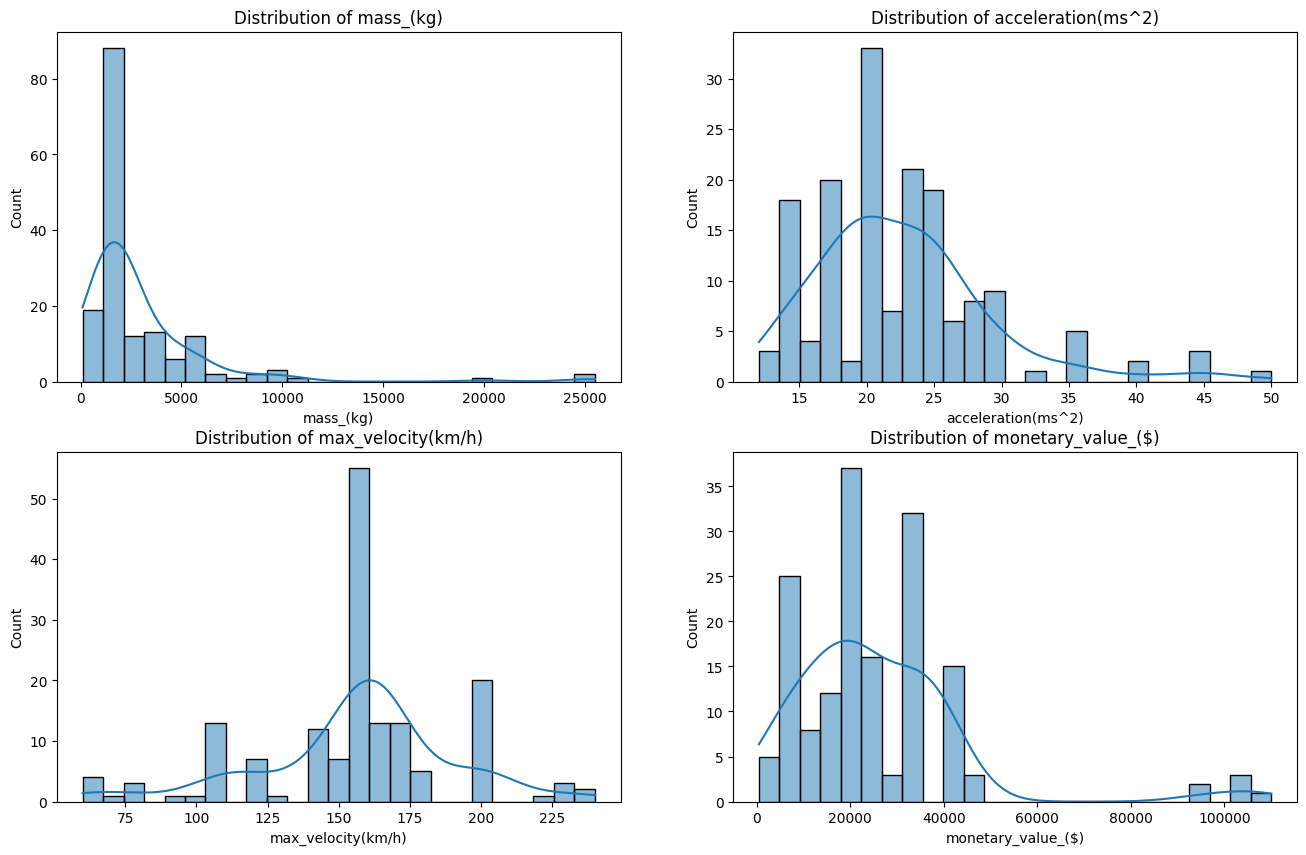

In [32]:
features = ['mass_(kg)', 'acceleration(ms^2)', 'max_velocity(km/h)', 'monetary_value_($)']

plt.figure(figsize=(16, 10))
for i, c in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[c], bins=25, kde=True)
    plt.title(f'Distribution of {c}')

## Categorical Features: Drivetrain & Engine Type Distribution

To get a sense of the categorical features in the dataset, I start by visualizing the distribution of drivetrain types across vehicles:
- Rear-wheel drive (RWD)
- Front-wheel drive (FWD)
- All-wheel drive (AWD / 4WD)

This plot shows how many vehicles fall into each category, giving us an idea of which drivetrain type is most common in the game.

Next, I examine the engine type distribution, which shows how many vehicles run on:
- Petrol
- Diesel
- Electric power

Both of these bar plots help us understand the diversity (or lack thereof) in vehicle mechanics, and whether we’re dealing with balanced categories or heavily skewed ones - useful information for modeling and feature encoding later on.

Text(0.5, 1.0, 'Drive Type Distribution')

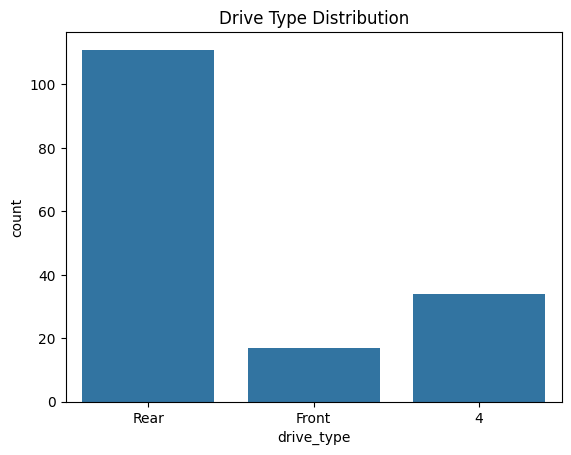

In [33]:
sns.countplot(x=df['drive_type'], order=['Rear', 'Front', '4'])
plt.title('Drive Type Distribution')

Text(0.5, 1.0, 'Engine Type Distribution')

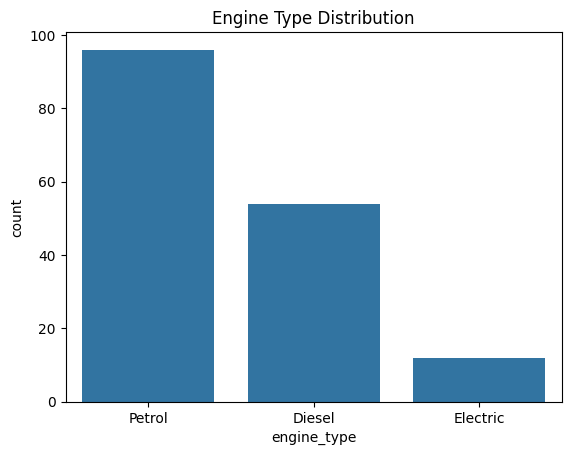

In [34]:
sns.countplot(x=df['engine_type'], order=['Petrol', 'Diesel', 'Electric'])
plt.title('Engine Type Distribution')

## Acceleration by Drivetrain Type: A Boxplot View

To explore how drivetrain type affects vehicle performance, I visualize acceleration grouped by drive type using a boxplot.

Boxplots allow us to compare the distribution, median, and variability of acceleration for each category:
- Rear-wheel drive
- Front-wheel drive
- All-wheel drive

This helps us spot interesting patterns, such as whether a certain drivetrain tends to have better acceleration, more consistency, or more outliers. It's a great way to highlight differences that might not be obvious from summary statistics alone.

Text(0.5, 1.0, 'Acceleration by Drive Type')

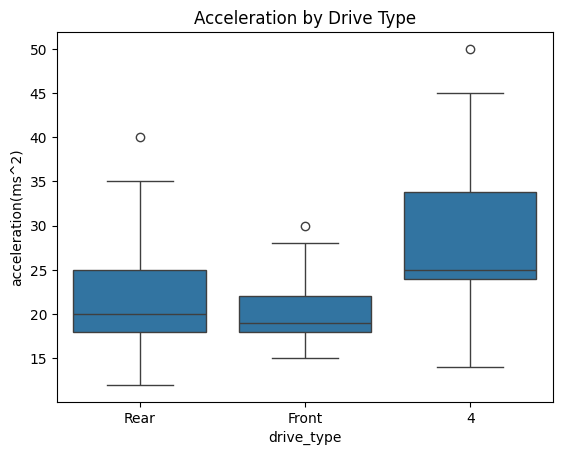

In [35]:
sns.boxplot(x=df['drive_type'], y=df['acceleration(ms^2)'], order=['Rear', 'Front', '4'])
plt.title('Acceleration by Drive Type')

## Mass vs Acceleration: Scatterplot with Drivetrain Highlight

To investigate how a vehicle’s mass relates to its acceleration, I use a scatterplot where each point represents a vehicle, colored by its drive type (FWD, RWD, or AWD).
This plot helps reveal potential trends - for example, whether heavier cars generally accelerate slower, and how drivetrain types are distributed across the performance spectrum.

Text(0.5, 1.0, 'Mass vs Acceleration by Drive Type')

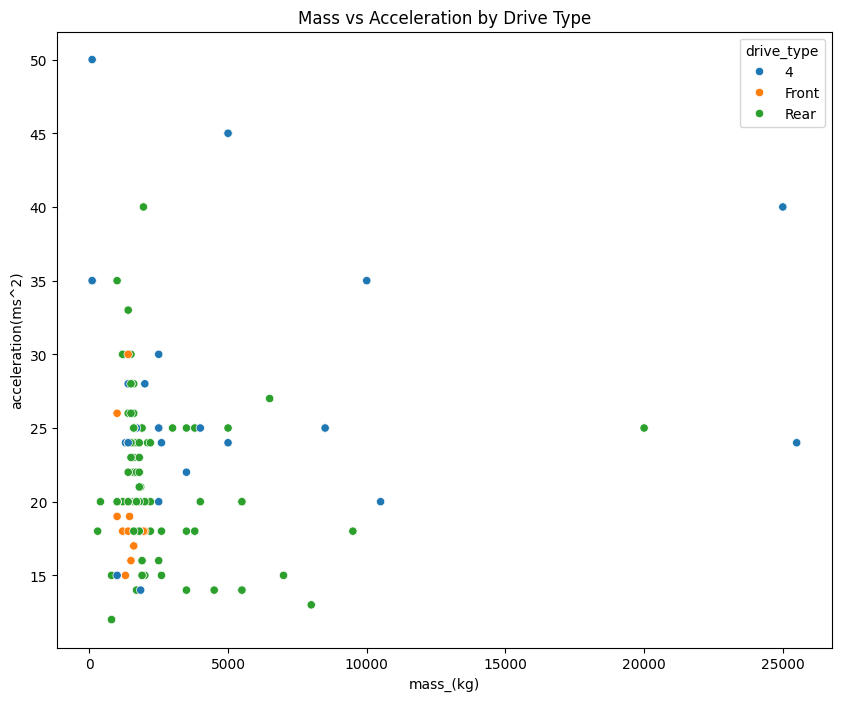

In [36]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='mass_(kg)', y='acceleration(ms^2)', hue='drive_type', data=df)
plt.title('Mass vs Acceleration by Drive Type')

##  Focused View: Zooming in on Typical Values

The previous scatterplot included a few extreme values (such as ultra-heavy or ultra-fast vehicles), which made it harder to see the general trend. To get a clearer view of the main data cluster, I applied the following filters:
- Acceleration ≤ 35 m/s²
- Mass ≤ 10,000 kg

I use sns.lmplot() to display the filtered scatterplot along with regression lines for each drivetrain type. This helps visualize the linear relationship between mass and acceleration.

Key Observation: in general, heavier vehicles should accelerate more slowly, which is expected due to basic physics. However, 4WD (all-wheel drive) vehicles are an exception - their regression line suggests better acceleration as mass increases, likely due to the presence of special-purpose vehicles in this category, which are designed to maintain high performance despite their weight.

The slope of the regression line differs between drivetrain types:
- For front-wheel drive (FWD) vehicles, acceleration drops off more steeply as mass increases.
- Rear-wheel drive (RWD) vehicles show a less drastic decline, indicating they may handle additional weight more efficiently.

These patterns reflect not only drivetrain mechanics but also the intended in-game role and tuning of various vehicle types.

Text(0.5, 1.0, 'Mass vs Acceleration by Drive Type')

<Figure size 1000x800 with 0 Axes>

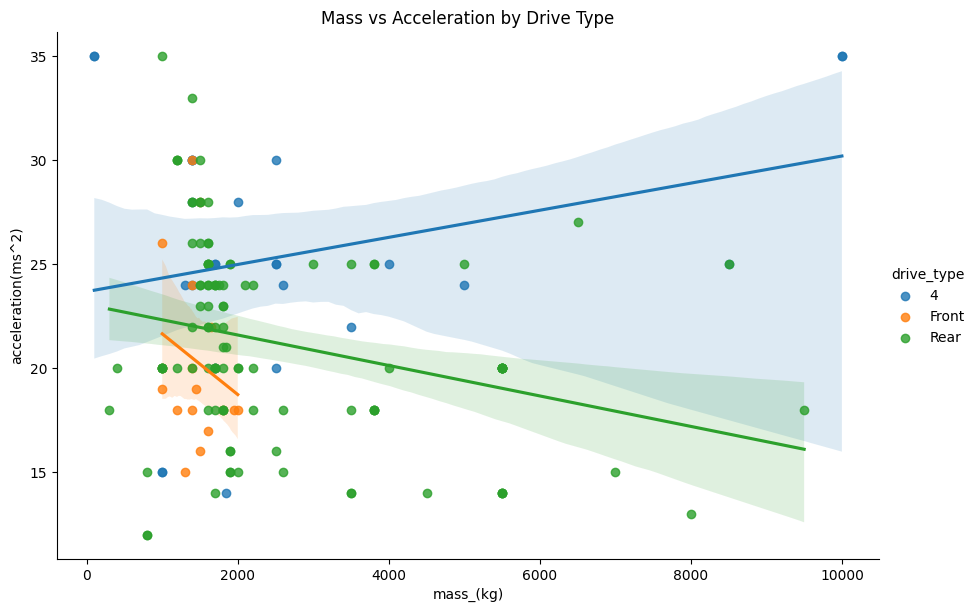

In [37]:
df_filtered = df[(df['mass_(kg)'] <= 10000) & (df['acceleration(ms^2)'] <= 35)]

plt.figure(figsize=(10, 8))
sns.lmplot(x='mass_(kg)', y='acceleration(ms^2)', hue='drive_type', data=df_filtered,
           height = 6, aspect = 1.5)
plt.title('Mass vs Acceleration by Drive Type')

## Relationship Between Traction Multiplier and Brakes Bias

Next, I explore the interaction between two important vehicle handling parameters:
- Traction Multiplier - which affects how well the vehicle grips the road,
- Brakes Bias (%) - representing the distribution of braking force between the front and rear wheels.

The scatterplot visualizes how these two features relate to each other across all vehicles. Understanding this relationship can help identify if there are common patterns or trade-offs in vehicle tuning - for example, whether cars with higher traction tend to have a front- or rear-biased braking system.

This insight is valuable for interpreting vehicle dynamics in the game and could inform feature engineering or clustering in further analysis.

Text(0.5, 1.0, 'Traction vs Brake bias')

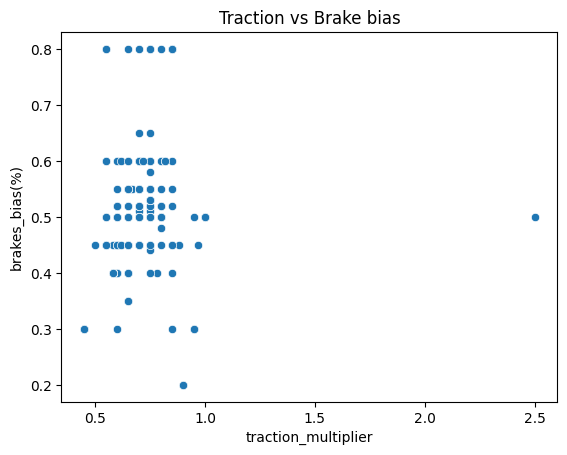

In [38]:
sns.scatterplot(x='traction_multiplier', y='brakes_bias(%)', data=df)
plt.title('Traction vs Brake bias')

## Pairwise Relationships Between Key Technical Features

To get an overview of how the most important technical features relate to each other, I use a pairplot. This kind of plot shows:
- Distributions of each variable along the diagonal,
- Scatterplots between all pairs of features in the lower triangle.

The features included in this analysis are:
- mass (kg)
- acceleration (m/s²)
- max_velocity (km/h)
- traction_multiplier
- brakes_deceleration (m/s²)
- collision_damage_multiplier

While the plot is quite dense due to the number of combinations, it allows us to:
- Quickly spot potential linear or non-linear relationships,
- Identify clusters or outliers,
- Detect correlations worth investigating further.

**Note:** This is mostly for exploratory purposes. For deeper analysis, we may later reduce dimensionality or focus on specific relationships separately.

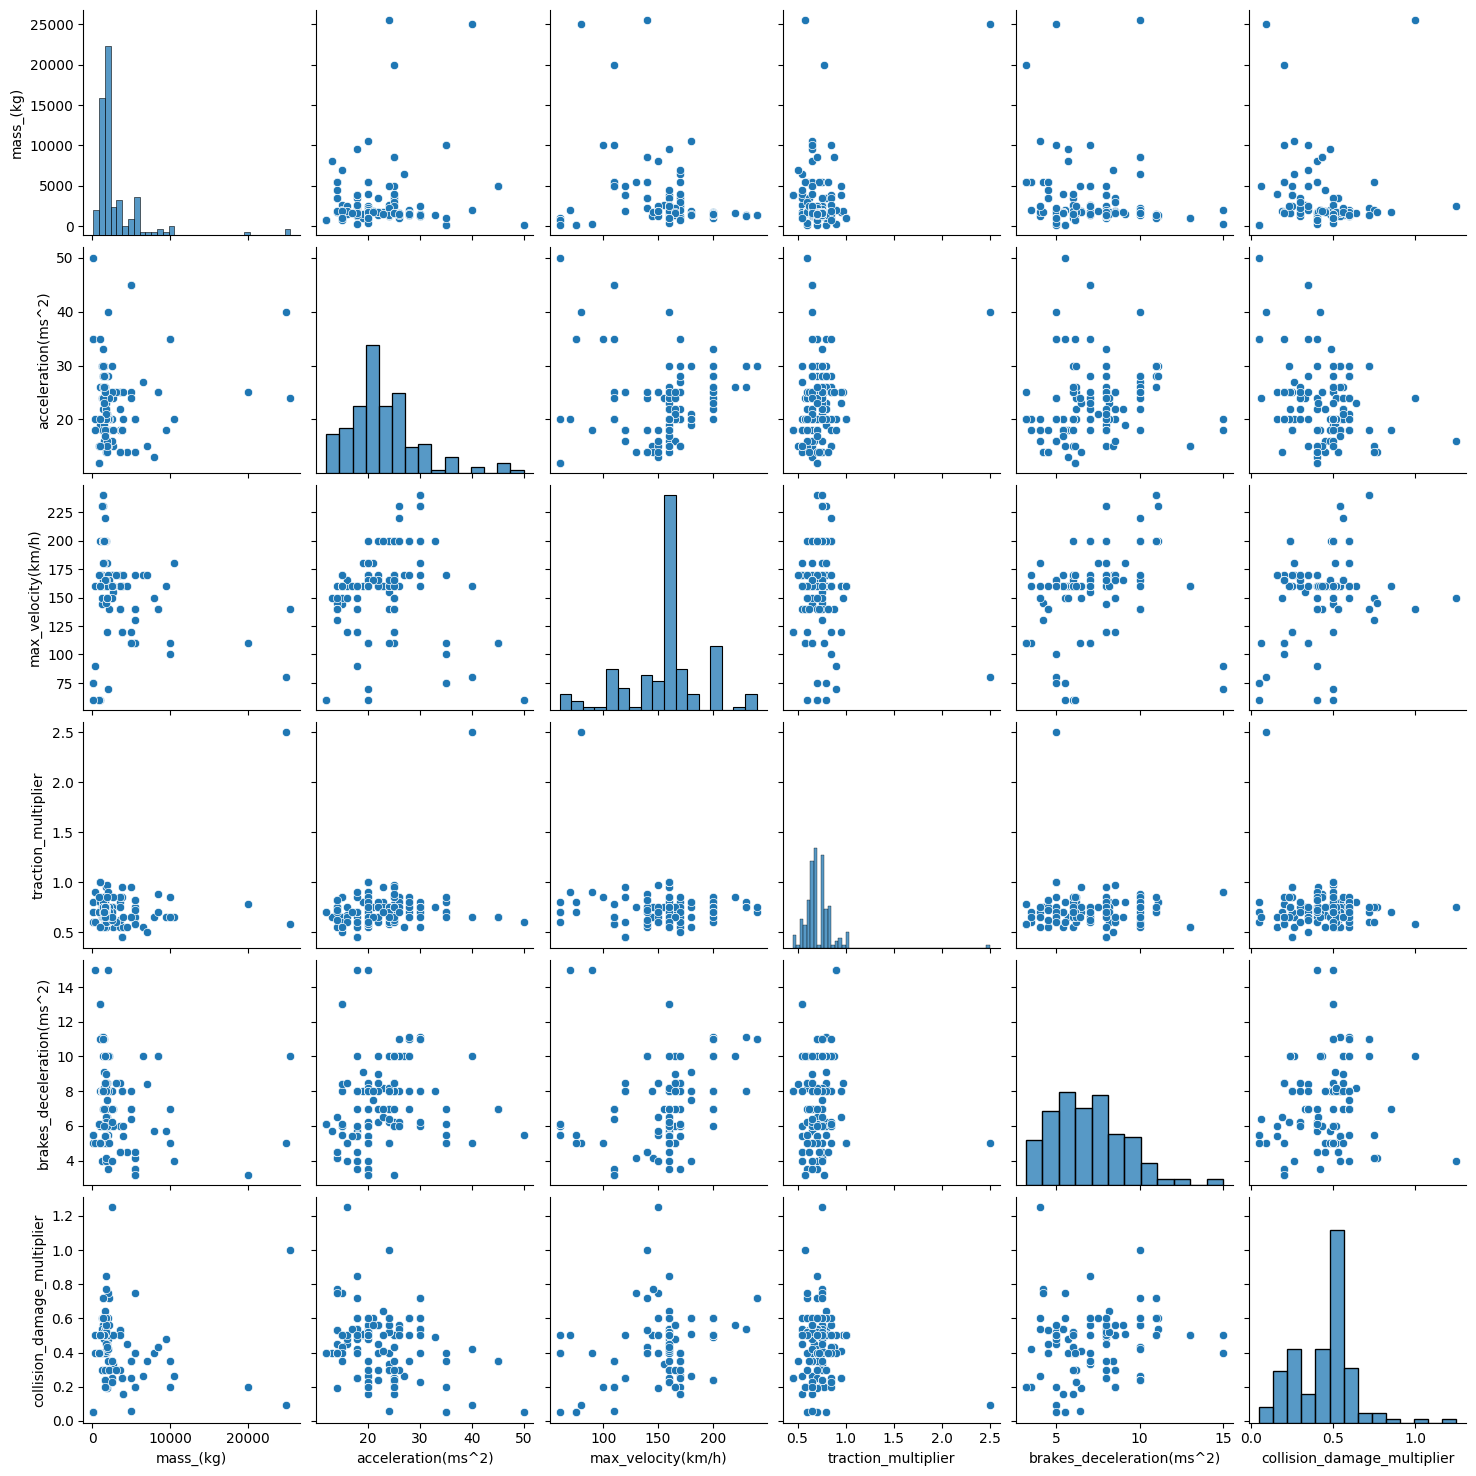

In [39]:
features1 = ['mass_(kg)', 'acceleration(ms^2)', 'max_velocity(km/h)',
            'traction_multiplier', 'brakes_deceleration(ms^2)', 'collision_damage_multiplier']

sns.pairplot(df[features1])

# Vehicle Rankings: Best and Worst Performers by Key Attributes

After analyzing general patterns across all vehicles and technical features, it's time to focus on individual cars. In this section, I identify and rank the best and worst performers based on specific attributes. This gives us a clearer picture of how certain vehicles stand out within the GTA: San Andreas universe - whether as top-tier sports cars, bulky utility vehicles, or surprisingly tough survivors.

I visualize each ranking using bar plots, where I highlight:
- Top 15 fastest vehicles (based on max velocity),
- Top 15 slowest vehicles,
- Top 10 vehicles with the best acceleration,
- Top 10 heaviest vehicles,
- Top 10 most damage-resistant vehicles (based on the collision_damage_multiplier - lower values indicate better durability).

These comparisons help us spot the standout models and perhaps even define "vehicle archetypes" based on in-game performance.

In [40]:
top_speed = df.sort_values(by='max_velocity(km/h)', ascending=False).head(15)
top_speed

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass_x,center_of_mass_y,center_of_mass_z,center_of_mass_%submerged,traction_multiplier,traction_loss,traction_bias(%),#_of_gears,max_velocity(km/h),acceleration(ms^2),interia,drive_type,engine_type,brakes_deceleration(ms^2),brakes_bias(%),abs,steering_lock_(°),suspension_force_level,suspension_damping_level,suspension_high_speed_com_damping,suspension_lines_upper_limit,suspension_lines_lower_limit,suspension_lines_bias_between_front_and_rear,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights_front,lights_rear,lights_anim_group
11,INFERNUS,1400.0,2725.3,1.5,0.0,0.00,-0.25,70,0.70,0.80,0.50,5,240.0,30.0,10.0,4,Petrol,11.0,0.51,0,30.0,1.2,0.19,0.0,0.25,-0.10,0.50,0.4,0.37,0.72,95000,40002004,C04000,Small,Small,1.0
46,TURISMO,1400.0,3000.0,2.0,0.0,-0.30,-0.20,70,0.75,0.85,0.45,5,240.0,30.0,10.0,4,Petrol,11.0,0.51,0,30.0,1.2,0.13,0.0,0.15,-0.20,0.50,0.4,0.17,0.72,95000,40002004,C08401,Small,Small,1.0
77,SUPERGT,1400.0,2800.0,2.0,0.0,-0.20,-0.24,70,0.75,0.86,0.48,5,230.0,26.0,5.0,Rear,Petrol,8.0,0.52,0,30.0,1.0,0.20,0.0,0.25,-0.10,0.50,0.3,0.40,0.54,105000,40002004,208000,Long,Long,1.0
101,BULLET,1200.0,2500.0,1.8,0.0,-0.15,-0.20,70,0.75,0.90,0.48,5,230.0,30.0,10.0,Rear,Petrol,8.0,0.58,0,30.0,1.0,0.13,5.0,0.25,-0.10,0.45,0.3,0.15,0.54,105000,c0002004,204000,Long,Long,1.0
15,CHEETAH,1200.0,3000.0,2.0,0.0,-0.20,-0.20,70,0.80,0.90,0.50,5,230.0,30.0,10.0,Rear,Petrol,11.1,0.48,0,35.0,0.8,0.20,0.0,0.10,-0.15,0.50,0.6,0.40,0.54,105000,c0002004,208000,Long,Long,1.0
69,HOTRING,1600.0,4500.0,1.4,0.0,0.20,-0.40,70,0.85,0.80,0.48,5,220.0,26.0,5.0,Rear,Petrol,10.0,0.52,0,30.0,1.5,0.10,10.0,0.29,-0.16,0.60,0.4,0.20,0.56,45000,40002004,C00000,Small,Small,0.0
27,BANSHEE,1400.0,3000.0,2.0,0.0,0.00,-0.20,70,0.75,0.89,0.50,5,200.0,33.0,10.0,Rear,Petrol,8.0,0.52,0,34.0,1.6,0.10,5.0,0.30,-0.15,0.50,0.3,0.15,0.49,45000,2004,200000,Small,Small,1.0
31,HOTKNIFE,1400.0,3400.0,2.5,0.0,0.30,-0.30,75,0.75,0.80,0.50,5,200.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,0.8,0.08,0.0,0.28,-0.20,0.40,0.3,0.20,0.60,35000,40006800,8000,Small,Small,0.0
2,BUFFALO,1500.0,4000.0,2.0,0.0,0.00,-0.10,85,0.70,0.90,0.50,9,200.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,1.2,0.12,0.0,0.28,-0.24,0.50,0.4,0.25,0.50,35000,2800,10200000,Small,Small,0.0
24,PREMIER,1600.0,3921.3,1.8,0.0,-0.40,0.00,75,0.75,0.85,0.52,5,200.0,22.0,10.0,Rear,Petrol,10.0,0.53,0,35.0,1.3,0.12,0.0,0.28,-0.12,0.38,0.0,0.20,0.24,25000,40000000,10200008,Long,Small,0.0


Text(0.5, 1.0, 'Top 15 Fastest Cars')

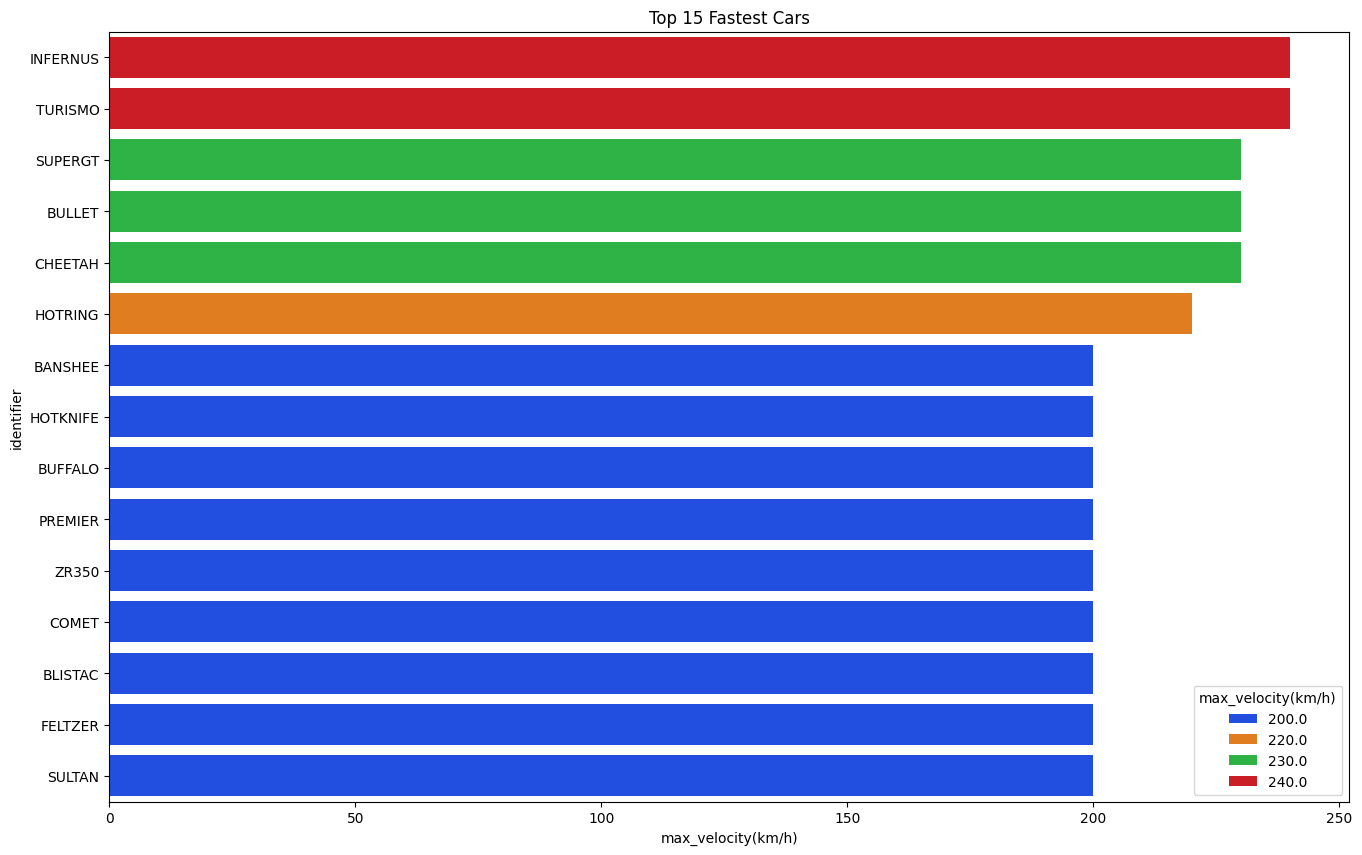

In [41]:
plt.figure(figsize=(16, 10))
sns.barplot(y='identifier', x='max_velocity(km/h)', hue='max_velocity(km/h)', data=top_speed, palette='bright')
plt.title('Top 15 Fastest Cars')

In [42]:
slowest = df.sort_values(by='max_velocity(km/h)', ascending=True).head(15)
slowest

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass_x,center_of_mass_y,center_of_mass_z,center_of_mass_%submerged,traction_multiplier,traction_loss,traction_bias(%),#_of_gears,max_velocity(km/h),acceleration(ms^2),interia,drive_type,engine_type,brakes_deceleration(ms^2),brakes_bias(%),abs,steering_lock_(°),suspension_force_level,suspension_damping_level,suspension_high_speed_com_damping,suspension_lines_upper_limit,suspension_lines_lower_limit,suspension_lines_bias_between_front_and_rear,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights_front,lights_rear,lights_anim_group
91,FORKLIFT,1000.0,1354.2,2.0,0.0,-0.20,-0.35,70,0.80,0.85,0.50,3,60.0,20.0,15.0,Front,Electric,6.00,0.50,0,30.0,2.0,0.14,0.0,0.25,-0.20,0.50,0.0,0.26,0.50,9000,1300,1040024,Small,Small,0.0
146,RCCAM,100.0,50.0,20.0,0.0,0.05,-0.20,70,0.60,0.90,0.49,1,60.0,50.0,10.0,4,Electric,5.50,0.50,0,25.0,3.0,0.30,0.0,0.15,-0.15,0.50,0.0,0.20,0.05,500,0,1000000,Long,Small,0.0
131,SWEEPER,800.0,632.7,5.0,0.0,0.00,-0.30,80,0.70,0.80,0.46,3,60.0,12.0,30.0,Rear,Petrol,6.10,0.55,0,35.0,1.6,0.15,0.0,0.34,-0.10,0.50,0.0,0.30,0.40,15000,40005a00,1308201,Small,Big,0.0
129,MOWER,800.0,500.0,5.0,0.0,0.00,-0.30,80,0.70,0.80,0.48,3,60.0,12.0,30.0,Rear,Petrol,6.10,0.55,0,35.0,1.0,0.15,0.0,0.15,-0.05,0.50,0.0,0.38,0.40,15000,40001b00,1308001,Small,Big,28.0
92,TRACTOR,2000.0,5000.0,3.0,0.0,0.00,-0.20,70,0.90,0.85,0.50,4,70.0,20.0,90.0,Rear,Diesel,15.00,0.20,0,50.0,2.0,0.12,0.0,0.25,-0.05,0.50,0.0,0.26,0.50,9000,201310,1340005,Small,Small,28.0
38,RCBANDIT,100.0,24.1,6.0,0.0,0.05,-0.10,70,0.80,0.90,0.49,1,75.0,35.0,5.0,4,Electric,5.50,0.50,0,25.0,1.6,0.10,0.0,0.28,-0.08,0.50,0.0,0.20,0.05,500,440000,0,Long,Small,0.0
121,RCTIGER,100.0,24.1,5.0,0.0,0.00,-0.10,70,0.70,0.90,0.49,1,75.0,35.0,15.0,4,Electric,5.00,0.50,0,45.0,1.6,0.10,0.0,0.28,-0.14,0.50,0.0,0.20,0.05,500,0,40,Long,Small,0.0
29,RHINO,25000.0,250000.0,5.0,0.0,0.00,0.00,90,2.50,0.80,0.50,4,80.0,40.0,150.0,4,Diesel,5.00,0.50,0,35.0,0.4,0.02,0.0,0.35,-0.10,0.50,0.0,0.22,0.09,110000,40008008,308840,Long,Small,24.0
128,KART,300.0,150.0,5.0,0.0,0.00,-0.15,110,0.90,0.85,0.48,4,90.0,18.0,5.0,Rear,Petrol,15.00,0.20,0,35.0,1.5,0.20,0.0,0.25,-0.04,0.50,0.0,0.38,0.40,15000,40001b00,308201,Small,Big,18.0
64,DOZER,10000.0,35000.0,20.0,0.0,-0.50,-0.50,90,0.85,0.80,0.60,5,100.0,35.0,150.0,4,Diesel,5.00,0.40,0,45.0,1.4,0.15,0.0,0.25,-0.20,0.35,0.0,0.45,0.20,5000,308,340220,Long,Small,17.0


Text(0.5, 1.0, 'Top 15 Slowest Cars')

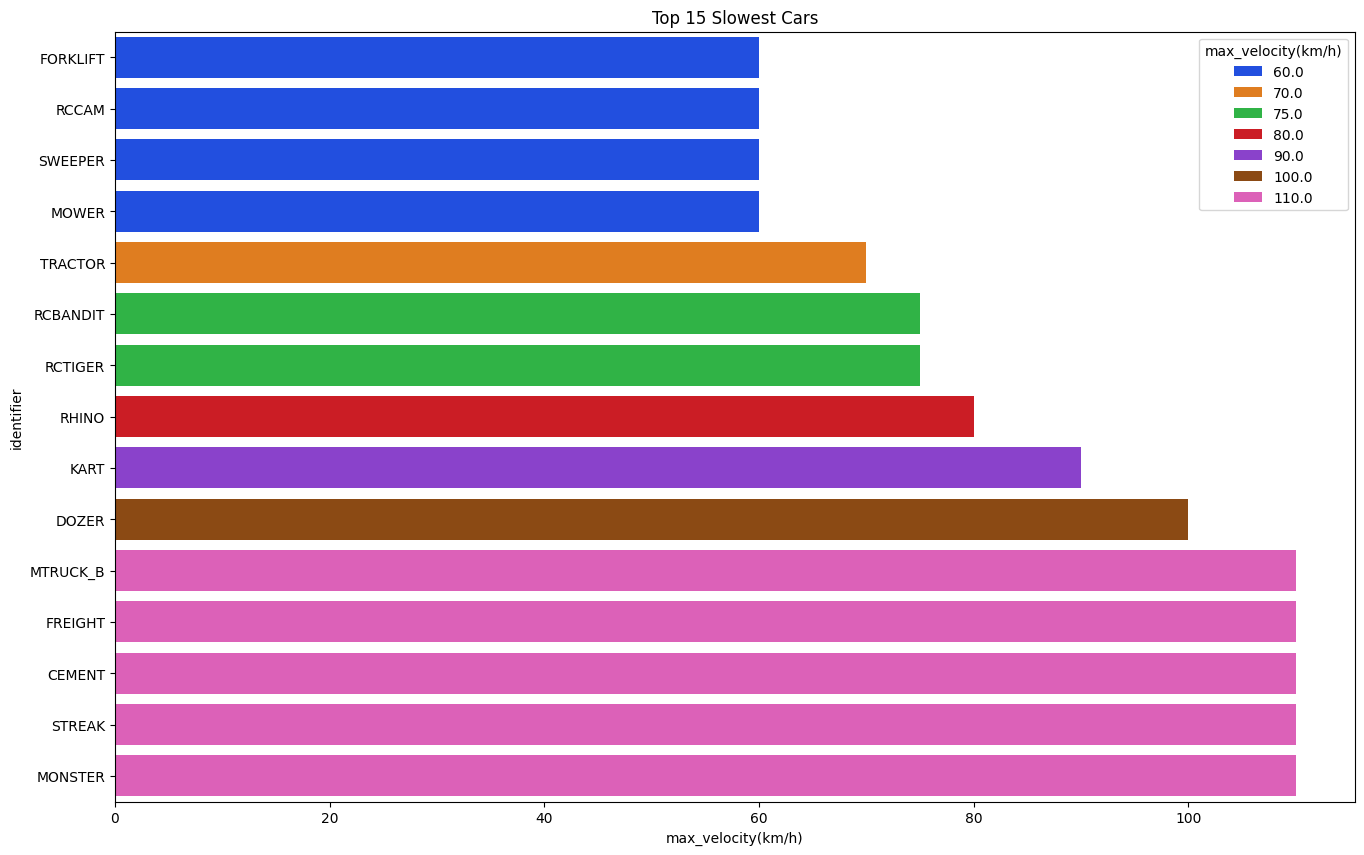

In [43]:
plt.figure(figsize=(16, 10))
sns.barplot(y='identifier', x='max_velocity(km/h)', hue='max_velocity(km/h)', data=slowest, palette='bright')
plt.title('Top 15 Slowest Cars')

Text(0.5, 1.0, 'Top 10 Acceleration')

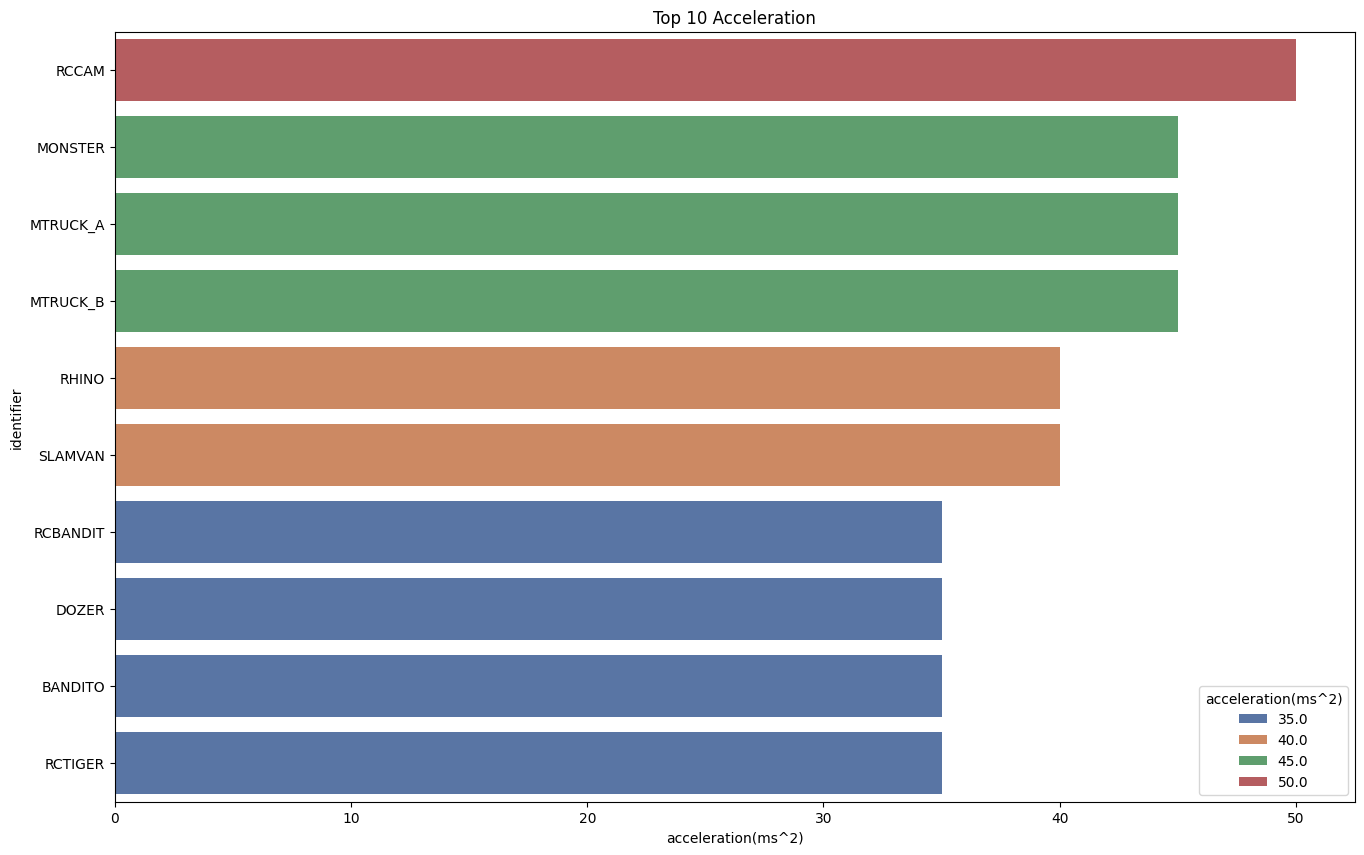

In [44]:
acceleration = df.sort_values(by='acceleration(ms^2)', ascending=False).head(10)
plt.figure(figsize=(16, 10))
sns.barplot(y='identifier', x='acceleration(ms^2)', hue='acceleration(ms^2)', data=acceleration, palette='deep')
plt.title('Top 10 Acceleration')

Text(0.5, 1.0, 'Top 10 Heaviest Vehicles')

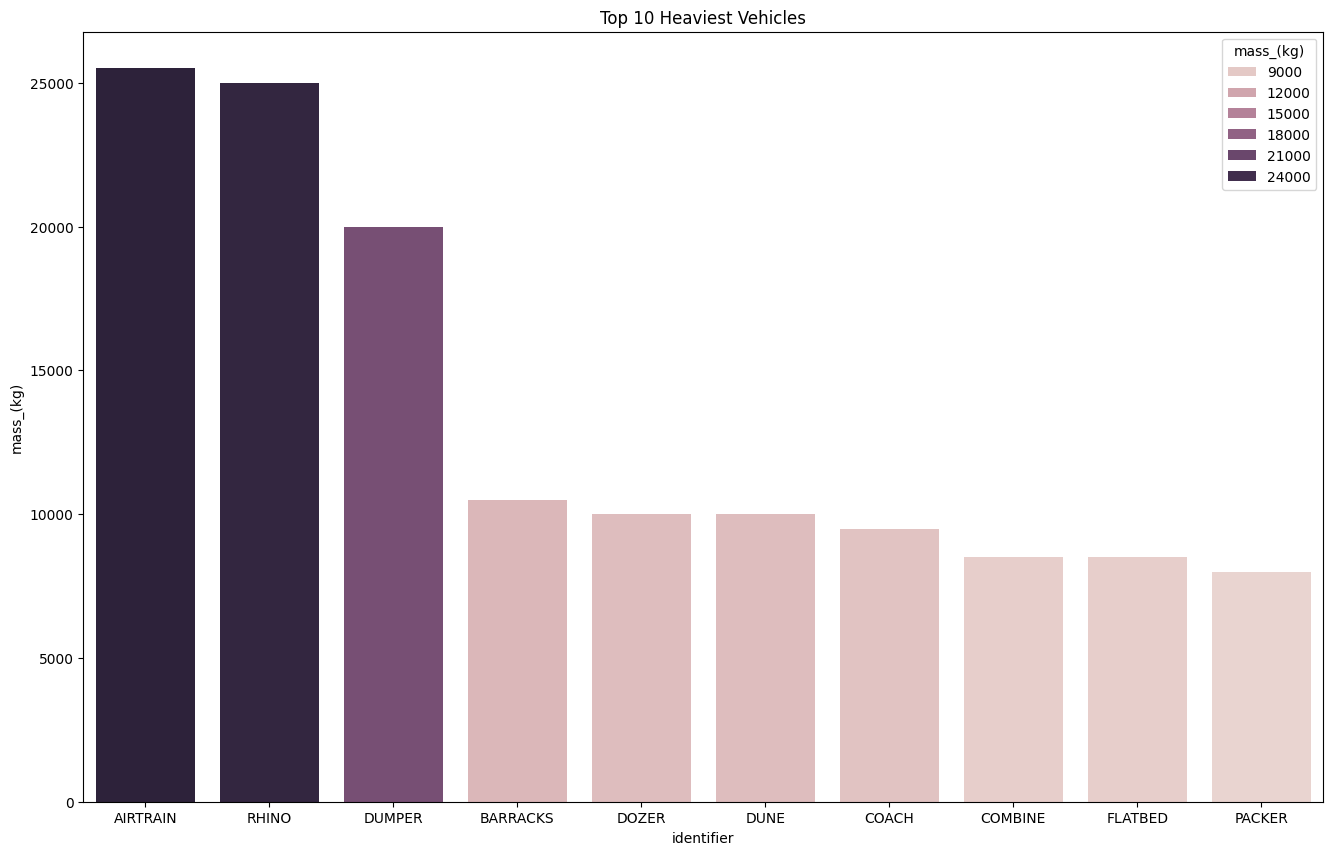

In [45]:
heaviest = df.sort_values(by='mass_(kg)', ascending=False).head(10)
plt.figure(figsize=(16, 10))
sns.barplot(x='identifier', y='mass_(kg)', hue='mass_(kg)', data=heaviest)
plt.title('Top 10 Heaviest Vehicles')

Text(0.5, 1.0, 'Top 10 Most Damage-Resistant Vehicles (Lower = Tougher)')

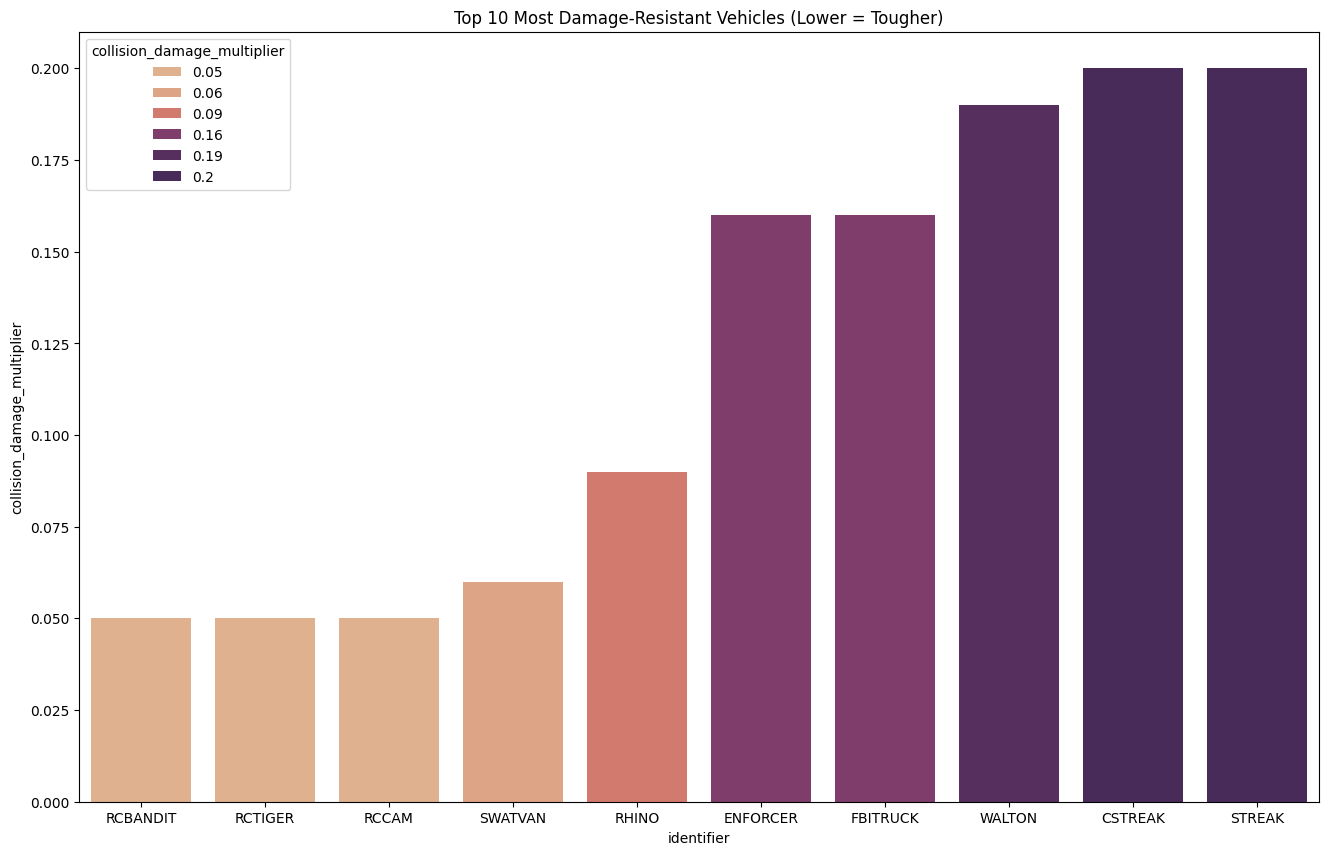

In [46]:
toughest = df.sort_values(by='collision_damage_multiplier', ascending=True).head(10)
plt.figure(figsize=(16, 10))
sns.barplot(x='identifier', y='collision_damage_multiplier', hue='collision_damage_multiplier', data=toughest, palette='flare')
plt.title('Top 10 Most Damage-Resistant Vehicles (Lower = Tougher)')

# Exploring Relationships Between Vehicle Attributes

In this section, we examine pairwise relationships between key features using regplot, which overlays a regression line to help visualize linear trends. These plots allow us to investigate how different characteristics influence each other - especially when it comes to price, speed, and durability.

## Max Speed vs Vehicle Price

As expected, vehicles with a higher maximum speed tend to be more expensive. The upward trend in the regression line confirms a strong positive correlation between these two variables.

Text(0.5, 1.0, 'Car Price vs Top Speed')

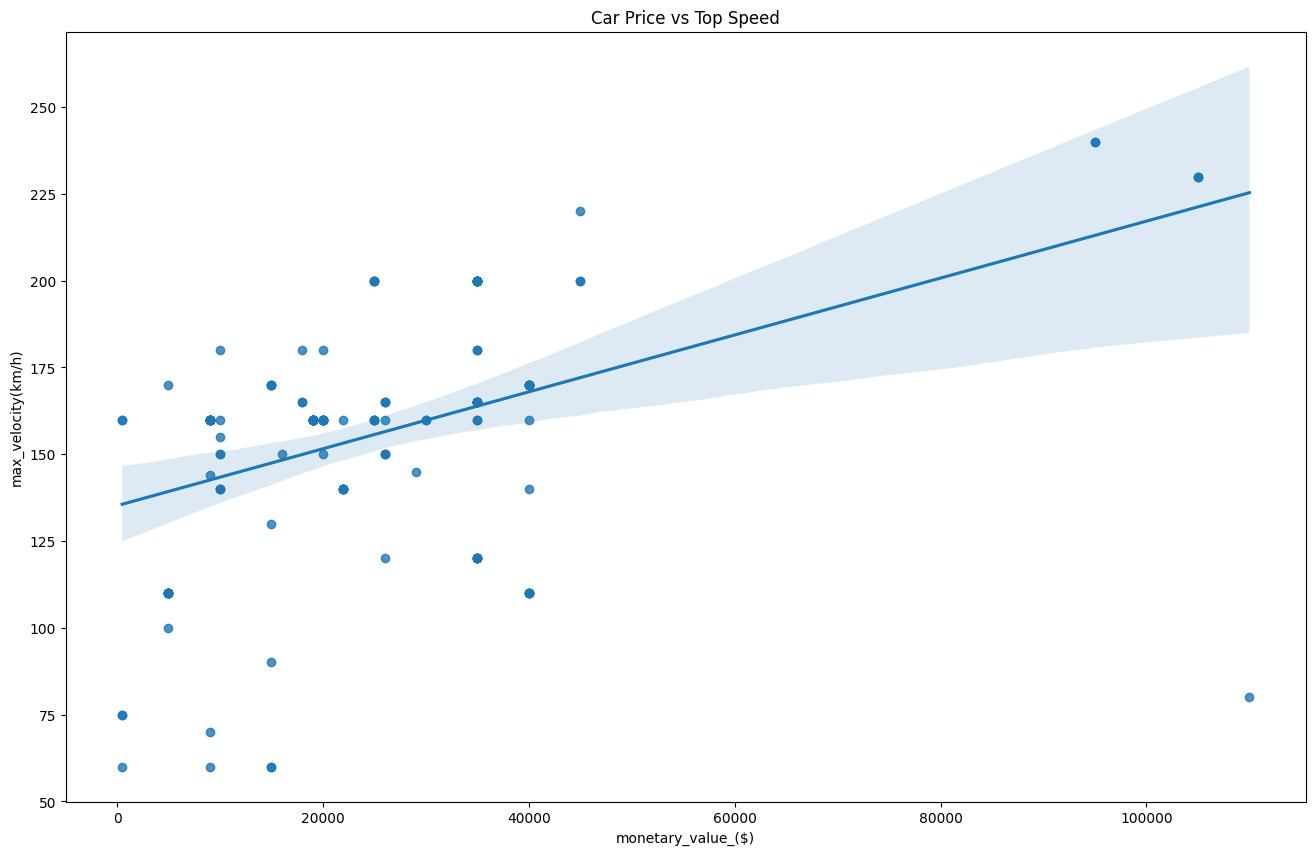

In [47]:
plt.figure(figsize=(16, 10))
sns.regplot(x='monetary_value_($)', y='max_velocity(km/h)', data=df)
plt.title('Car Price vs Top Speed')

## Acceleration vs Vehicle Price

A similar pattern holds for acceleration - cars that accelerate faster also come with a higher price tag. This suggests that performance clearly influences in-game value.

Text(0.5, 1.0, 'Car Price vs Acceleration')

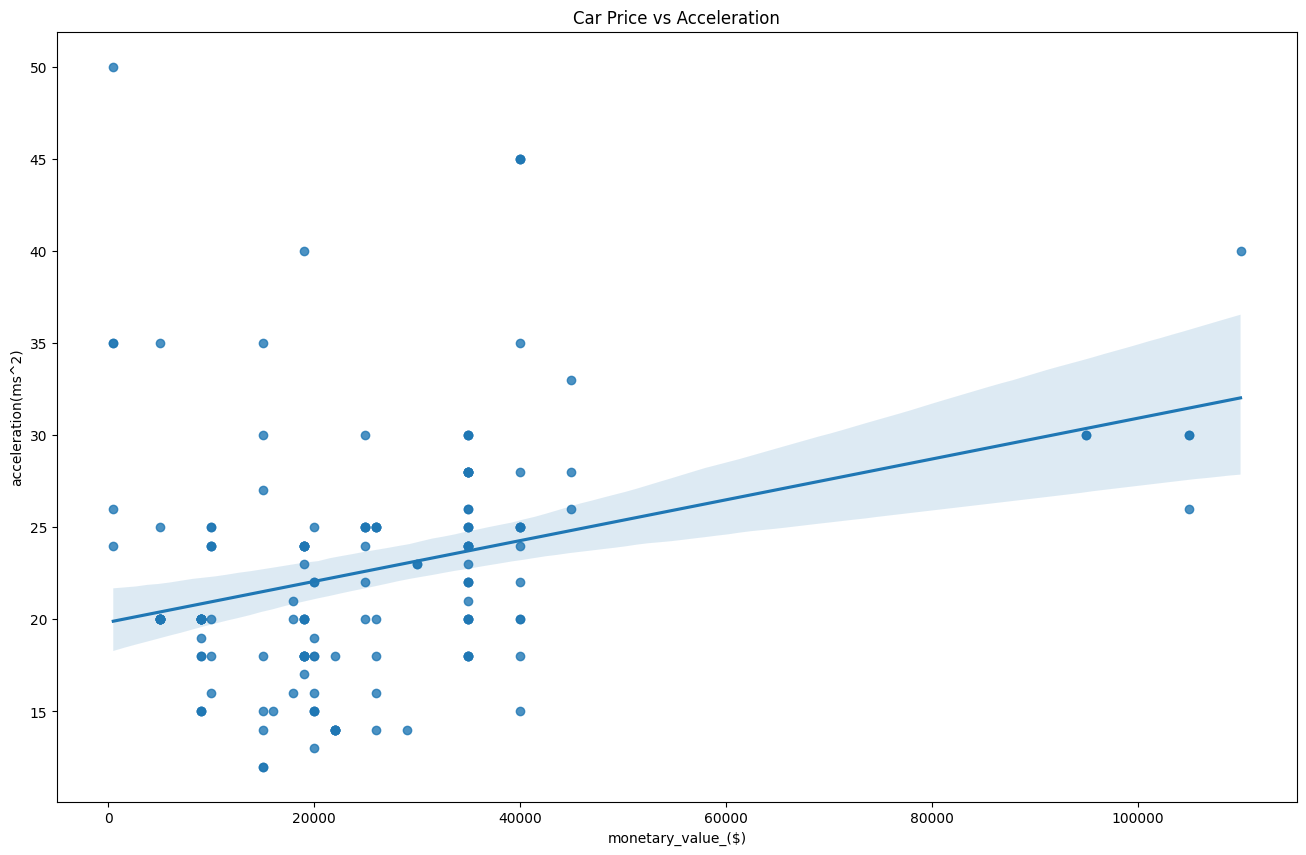

In [48]:
plt.figure(figsize=(16, 10))
sns.regplot(x='monetary_value_($)', y='acceleration(ms^2)', data=df)
plt.title('Car Price vs Acceleration')

## Collision Damage Multiplier vs Mass

Interestingly, heavier vehicles tend to have a lower collision damage multiplier, meaning they're more resistant to damage. The slight downward slope of the regression line supports this trend - bulkier vehicles can take more punishment.

Text(0.5, 1.0, 'Are heavier vehicles more durable?')

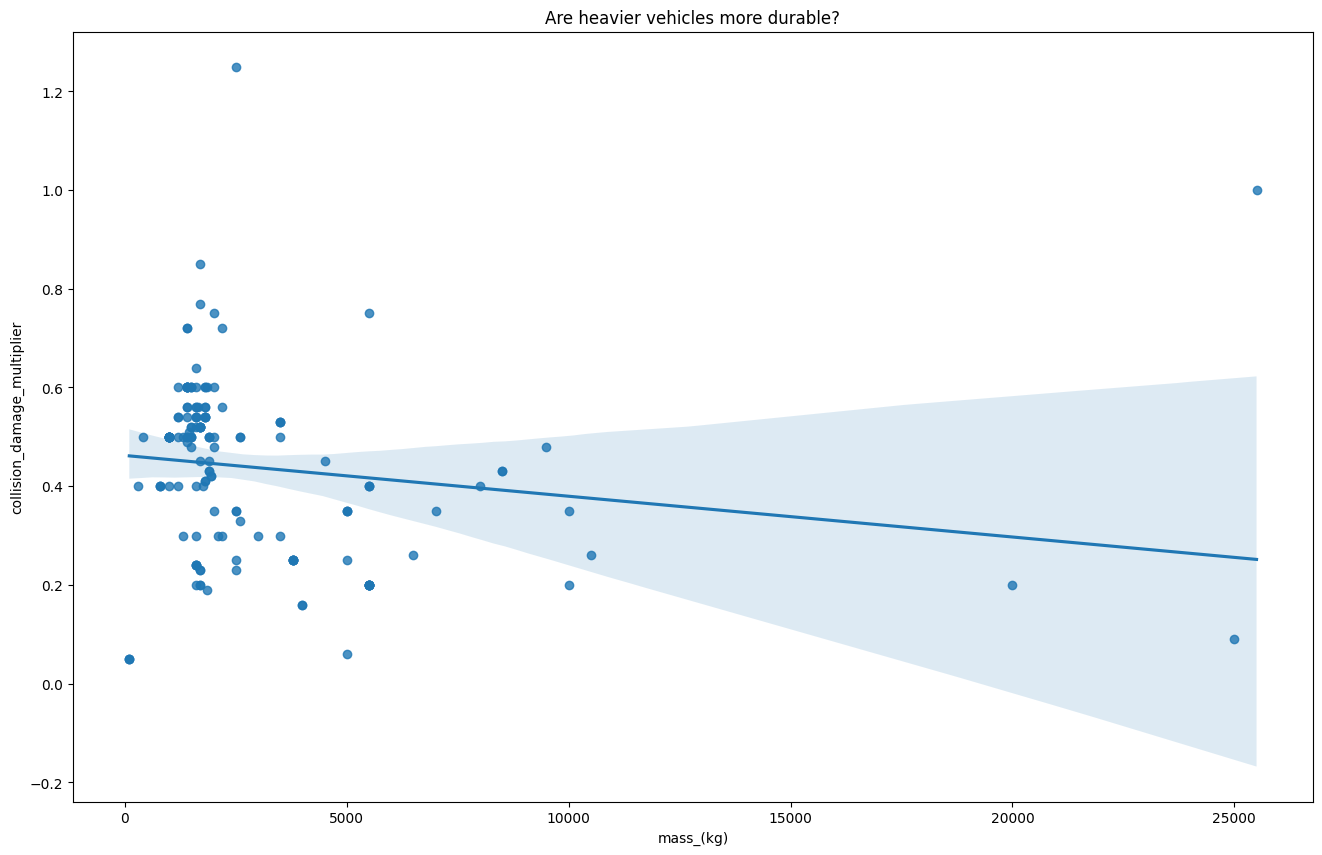

In [49]:
plt.figure(figsize=(16, 10))
sns.regplot(x='mass_(kg)', y='collision_damage_multiplier', data=df)
plt.title('Are heavier vehicles more durable?')

## Acceleration vs Max Speed

Surprisingly, the regression line here is almost completely flat, indicating no clear relationship between a vehicle’s top speed and its acceleration.
This suggests that in GTA: San Andreas, a car can reach high speeds without necessarily having strong acceleration, and vice versa. It might reflect the arcade-style balancing of vehicles in the game, where those traits are designed independently for gameplay variety.

In a real-world context, we'd expect some correlation here - but this flat line reminds us we're in a game world, not a wind tunnel.

Text(0.5, 1.0, 'Top Speed vs Acceleration')

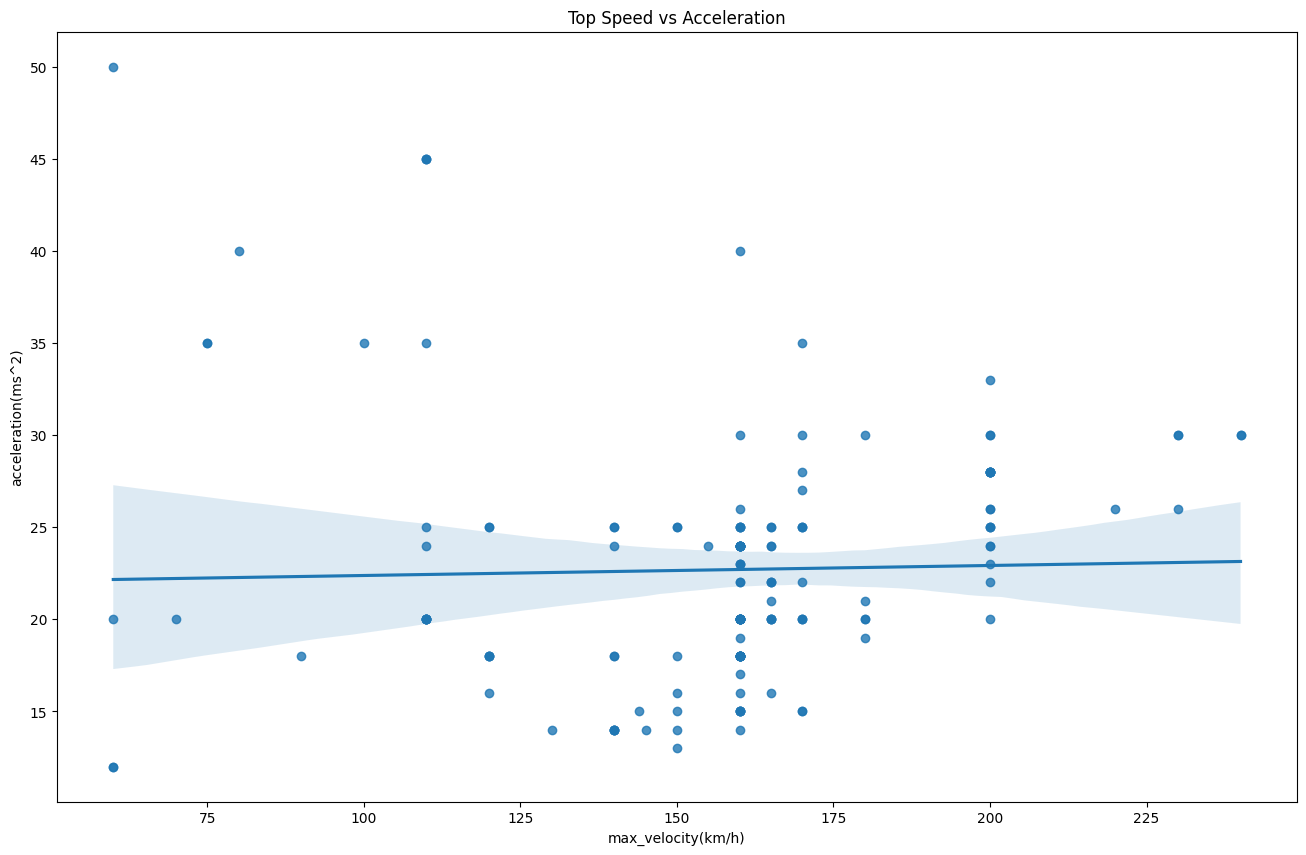

In [50]:
plt.figure(figsize=(16, 10))
sns.regplot(x='max_velocity(km/h)', y='acceleration(ms^2)', data=df)
plt.title('Top Speed vs Acceleration')

# Final Thoughts

Throughout this exploratory data analysis, we took a deep dive into the technical attributes and performance characteristics of vehicles from GTA: San Andreas.
We started by examining general feature distributions, uncovering relationships between drivetrain types, acceleration, weight, and durability. Then, we shifted our focus to individual vehicles, identifying the fastest, slowest, heaviest, and most damage-resistant cars in the game.
Finally, we explored pairwise relationships between features like speed, acceleration, mass, and price - revealing both expected trends and some surprising exceptions (like the flat relationship between top speed and acceleration!).

Although there are still more features left to explore, this analysis lays a solid foundation for understanding how the in-game vehicles are designed and balanced - and hopefully inspires further experimentation, modeling, or even just curiosity about Rockstar's vehicle logic.

## Thank You!

Thanks for taking the time to explore this dataset with me!
If you found this notebook interesting or useful, feel free to:
- Check out [the full dataset](https://www.kaggle.com/datasets/marcelbiezunski/gta-san-andreas-vehicle-stats-full-handling-data) that I carefully compiled for this project.
- Leave an upvote - it helps others discover this work and motivates me to keep sharing more creative datasets and analyses!